In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Data Plotting

In [100]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


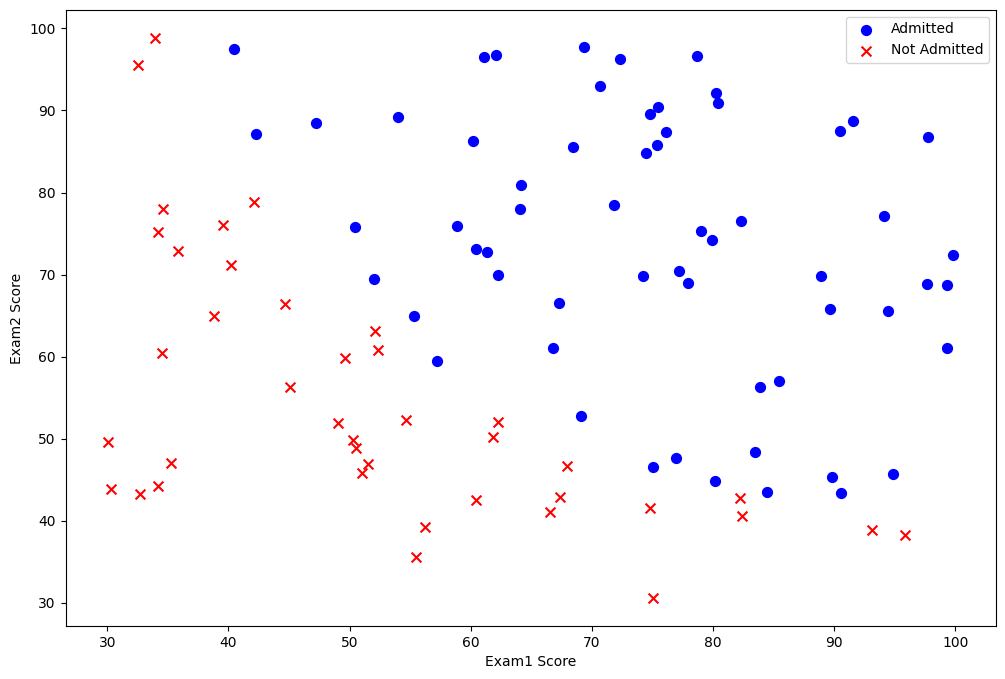

In [7]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()

In [101]:
# 初始化x，y，theta
data.insert(0, 'x_0', 1)
x = data.iloc[:, 0:-1]
x = np.matrix(x.values)
y = data.iloc[:, -1]
y = np.matrix(y.values).T
theta = np.zeros((3,1))

In [102]:
x.shape, y.shape, theta.shape

((100, 3), (100, 1), (3, 1))

## Cost Function

In [80]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [81]:
def costFunc(theta, x, y):
    s = sigmoid(x @ theta)
    p1 = np.multiply(-y, np.log(s))
    p2 = np.multiply((1-y), np.log(1-s))
    return (1/len(x)) * np.sum(p1-p2)

In [82]:
cost1 = costFunc(theta, x, y)
cost1

0.6931471805599453

## Gradient Descent

In [92]:
def gradientDescent(x, y, theta, alpha, iters):
    m = len(x)
    costs = []
    for i in range(iters):
        A = sigmoid(x @ theta)
        # X.T:X的转置
        theta = theta - (alpha/m) * x.T @ (A - y)
        cost = costFunc(theta, x, y)#计算每次迭代损失
        costs.append(cost)#总损失
    return costs, theta

In [93]:
#初始化参数
alpha = 0.004
iters = 200000
costs, theta_final = gradientDescent(x, y, theta, alpha, iters)#梯度下降完得到的参数theta和损失
print(theta_final)

[[-23.7748157 ]
 [  0.18690588]
 [  0.18046129]]


In [51]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return [1 if x>=0.5 else 0 for x in prob]

In [94]:
print(predict(x, theta_final))

[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1]


In [96]:
def predict(X, theta):
    prob = sigmoid(X @ theta)#逻辑回归的假设函数
    return [1 if x >= 0.5 else 0 for x in prob]
 
print(predict(x, theta_final))
 
y_ = np.array(predict(x, theta_final))#将预测结果转换为数组
print(y_)#打印预测结果
y_pre = y_.reshape(len(y_), 1)#将预测结果转换为一列
 
# 预测准确率
acc = np.mean(y_pre == y)
print(acc)#0.86

[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1]
[0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1]
0.86


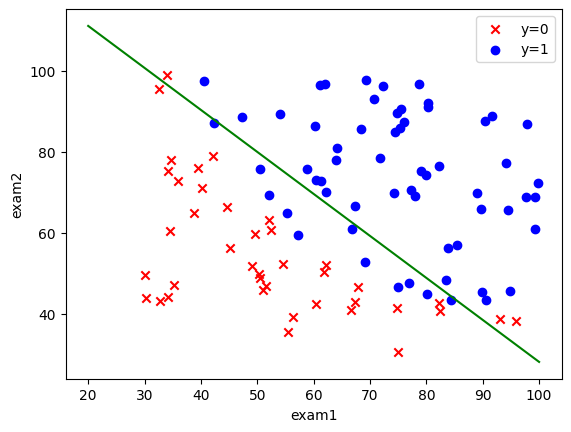

In [97]:
coef1 = - theta_final[0, 0] / theta_final[2, 0]
coef2 = - theta_final[1, 0] / theta_final[2, 0]
x = np.linspace(20, 100, 100)
f = coef1 + coef2 * x
fig, ax = plt.subplots()
ax.scatter(data[data['Admitted'] == 0]['Exam1'], data[data['Admitted'] == 0]['Exam2'], c='r', marker='x', label='y=0')
ax.scatter(data[data['Admitted'] == 1]['Exam1'], data[data['Admitted'] == 1]['Exam2'], c='b', marker='o', label='y=1')
ax.legend()
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')
ax.plot(x, f, c='g')
plt.show()

# Through sklearn

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [18]:
## data initialization
data = pd.read_csv('ex2data1.txt', header = None, names = ['x1', 'x2', 'y'])
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [19]:
model = LogisticRegression()
clf = model.fit(x,y)

In [9]:
sktheta = model.coef_
skintercept = model.intercept_
print(sktheta)
print(skintercept)

[[0.20535491 0.2005838 ]]
[-25.05219314]


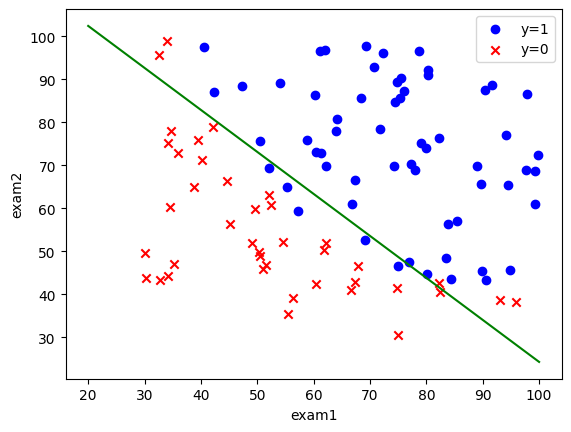

In [14]:
x = np.linspace(20, 100, 100)
f = -(sktheta[0][1]*x + skintercept[0]) / sktheta[0][0]

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fix, ax = plt.subplots()
ax.scatter(positive['x1'], positive['x2'], c='b', marker='o', label='y=1')
ax.scatter(negative['x1'], negative['x2'], c='r', marker='x', label='y=0')
ax.legend()
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')
ax.plot(x, f, c='g')
plt.show()

In [20]:
print(model.score(x,y))

0.89
